<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/California_Housing_Regression_Problem_using_Simple_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x


TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import matplotlib as mp
import tensorflow as tf
from tensorflow import keras

In [0]:
import scipy

In [0]:
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [0]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)

In [0]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

Activation: Output layer
>Since this is a regression task hence there is no need for activation function as discussed in Architecture of regression.

Loss:
> MSE as doing regression task.

Neuron:
> Since there is only one number to predict hence only single neuron.

Hidden Layer:
> Since the data is noise so only use one hidden layer. More layers can result in overfitting.

In [11]:
from keras.models import Sequential



Using TensorFlow backend.


In [0]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

In [0]:
model.compile(loss="mse", optimizer="sgd")

In [14]:
model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 257us/sample - loss: 0.7744 - val_loss: 27746.7495
Epoch 2/20
11610/11610 [==============================] - 1s 81us/sample - loss: 1.9574 - val_loss: 20571.4876
Epoch 3/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4889 - val_loss: 3484.3901
Epoch 4/20
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4274 - val_loss: 1305.2882
Epoch 5/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4056 - val_loss: 4442.5371
Epoch 6/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3926 - val_loss: 2902.0539
Epoch 7/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3908 - val_loss: 2483.4170
Epoch 8/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3868 - val_loss: 25195.4380
Epoch 9/20
11610/11610 [==============================] - 1s 79us/s

In [15]:
model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 49us/sample - loss: 12440.9410


12440.94101411095

In [0]:
X_new = X_test[:3] 

y_pred = model.predict(X_new)

In [17]:
y_pred

array([[ 82.93194],
       [121.17696],
       [ 82.95859]], dtype=float32)

In [0]:
los = pd.DataFrame(model.history.history)

In [19]:
los.head()

,loss,val_loss
0,0.774430,27746.749525
1,1.957388,20571.487604
2,0.488851,3484.390110
3,0.427379,1305.288193
4,0.405645,4442.537097


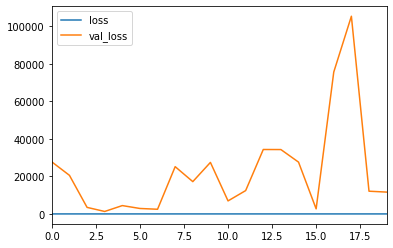

In [20]:
los.plot()